In [1]:
#Predicting heart-disease using machine learning
#This notebook looks into various python machine learning algorithms and
#data science libraries in an attempt to build an machine learning model capable
#of predicting whether the person has heart disease or not

#We are going to take the following approach
#1.Problem definition
#2.Data
#3.Evaluation
#4.Features
#5.Modelling
#6.Experimentation

#1.Problem statement
#Given clinical parameters of a patient and we have to predict whether the person
#has heart disease or not

#2.Data
#The original data came from uci heart diease kaggle 
#link - https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data

#3.Evaluation
#If we can reach 95 percent of accuracy of predicting whether a person has
#heart disease or not during proof of concept then we can pursue our project

#4.Features
'''id (Unique id for each patient)
age (Age of the patient in years)
origin (place of study)
sex (Male/Female)
cp chest pain type ([typical angina, atypical angina, non-anginal, asymptomatic])
trestbps resting blood pressure (resting blood pressure (in mm Hg on admission to the hospital))
chol (serum cholesterol in mg/dl)
fbs (if fasting blood sugar > 120 mg/dl)
restecg (resting electrocardiographic results)
-- Values: [normal, stt abnormality, lv hypertrophy]
thalach: maximum heart rate achieved
exang: exercise-induced angina (True/ False)
oldpeak: ST depression induced by exercise relative to rest
slope: the slope of the peak exercise ST segment
ca: number of major vessels (0-3) colored by fluoroscopy
thal: [normal; fixed defect; reversible defect]
num: the predicted attribute'''

'id (Unique id for each patient)\nage (Age of the patient in years)\norigin (place of study)\nsex (Male/Female)\ncp chest pain type ([typical angina, atypical angina, non-anginal, asymptomatic])\ntrestbps resting blood pressure (resting blood pressure (in mm Hg on admission to the hospital))\nchol (serum cholesterol in mg/dl)\nfbs (if fasting blood sugar > 120 mg/dl)\nrestecg (resting electrocardiographic results)\n-- Values: [normal, stt abnormality, lv hypertrophy]\nthalach: maximum heart rate achieved\nexang: exercise-induced angina (True/ False)\noldpeak: ST depression induced by exercise relative to rest\nslope: the slope of the peak exercise ST segment\nca: number of major vessels (0-3) colored by fluoroscopy\nthal: [normal; fixed defect; reversible defect]\nnum: the predicted attribute'

In [2]:
#Preparation of tools
#We are going to use numpy,pandas and matplotlib for this 

In [3]:
#importing the tools regular eda(exploratory data analysis)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#We want our plots to appear in this notebook
%matplotlib inline

#Models from sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#Model evaluation
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import recall_score,precision_score,f1_score
from sklearn.metrics import roc_curve

In [4]:
#Load the data
df=pd.read_csv("heart-disease.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df.shape

(303, 14)

#Data Exploration (exploratory analaysis of data)
The goal here is to find out more about the data and become a subject matter
1.What questions are you trying to solve
2.What kind of data do we have and how do we treat different types
3.Whats missing from the data and how to deal with it
4.Where are the outliners and how to notice them
5.How to add,remove the features to get more about the data

In [6]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [7]:
df["target"].value_counts()

target
1    165
0    138
Name: count, dtype: int64

<Axes: xlabel='target'>

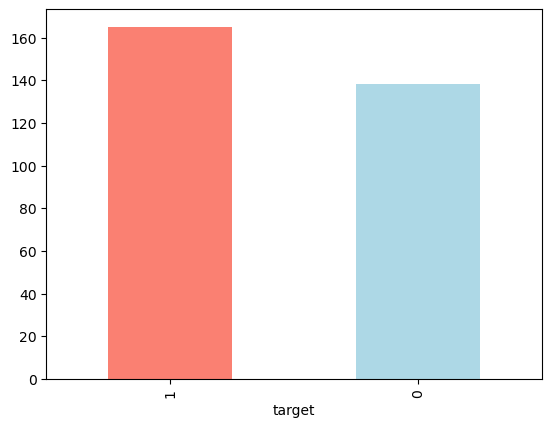

In [8]:
df["target"].value_counts().plot(kind="bar",color=["salmon","lightblue"])

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [10]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [11]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [12]:
df.sex.value_counts()
#So they are more male than female

sex
1    207
0     96
Name: count, dtype: int64

In [13]:
#Compare target column with sex column
pd.crosstab(df.target,df.sex)

sex,0,1
target,,
0,24,114
1,72,93


In [14]:
#There is almost 65% chance that the person has heart disease (if we only take sex
#feature into account

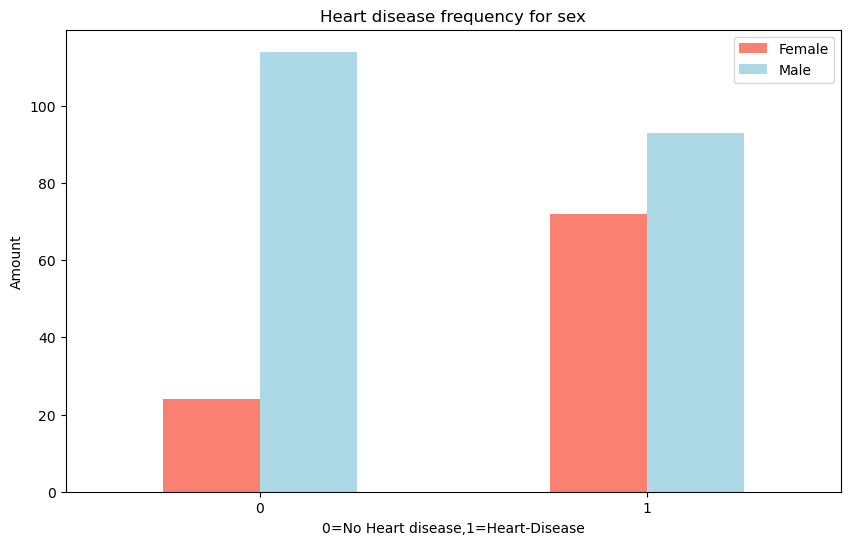

In [15]:
#Create a plot of crosstab
pd.crosstab(df.target,df.sex).plot(kind="bar",figsize=(10,6),
                                   color=["salmon","lightblue"])
plt.title("Heart disease frequency for sex")
plt.xlabel("0=No Heart disease,1=Heart-Disease")
plt.ylabel("Amount")
plt.legend(["Female","Male"])
plt.xticks(rotation=0);

In [16]:
df["thalach"].value_counts()
#There are many values so plotting on a graph is not a great idea

thalach
162    11
160     9
163     9
152     8
173     8
       ..
202     1
184     1
121     1
192     1
90      1
Name: count, Length: 91, dtype: int64

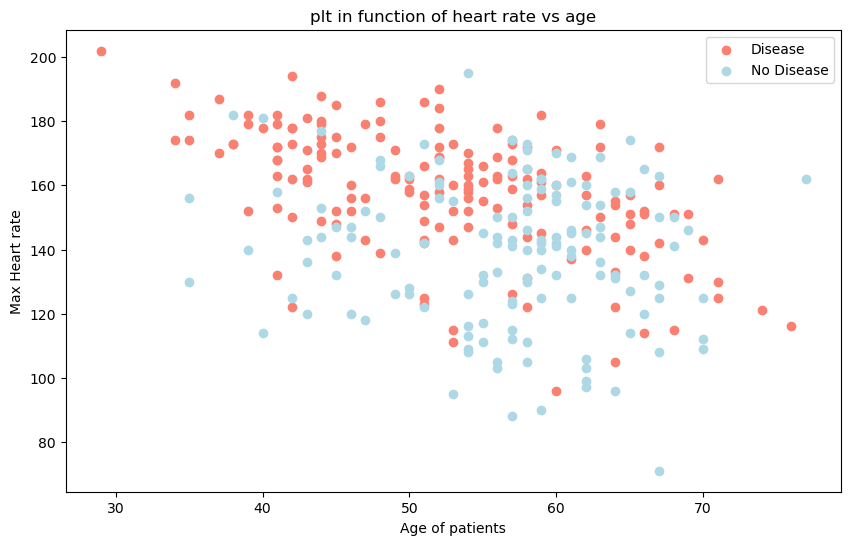

In [17]:
#Age vs Max Heart Rate
plt.figure(figsize=(10,6))

#Scatter with positive examples
plt.scatter(df.age[df.target==1]
            ,df.thalach[df.target==1]
            ,color="salmon");

#Scatter with negative examples
plt.scatter(df.age[df.target==0],
            df.thalach[df.target==0],
            color="lightblue");

#Add some info
plt.title("plt in function of heart rate vs age")
plt.xlabel("Age of patients")
plt.ylabel("Max Heart rate")
plt.legend(["Disease","No Disease"]);

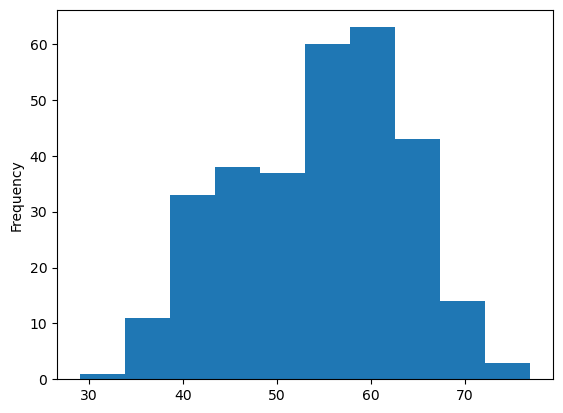

In [18]:
#Check the distribution of the age column using histogram
df.age.plot.hist();

In [19]:
##Heart disease frequency for chest pain type
pd.crosstab(df.cp,df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


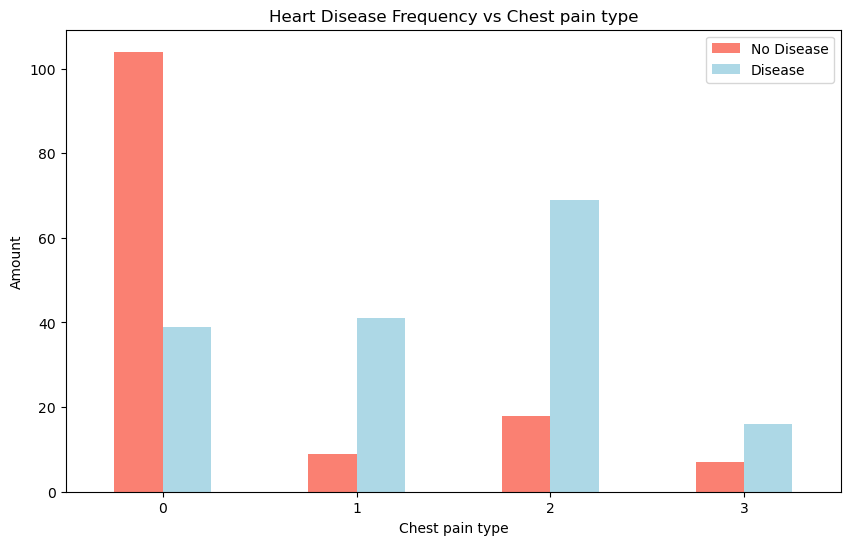

In [20]:
#Make the crosstab more visual
pd.crosstab(df.cp,df.target).plot(kind="bar",
                                    figsize=(10,6),
                                    color=["salmon","lightblue"]);
plt.xticks(rotation=0)
plt.title("Heart Disease Frequency vs Chest pain type")
plt.xlabel("Chest pain type")
plt.ylabel("Amount")
plt.legend(["No Disease","Disease"]);

In [21]:
#Make a correlation matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


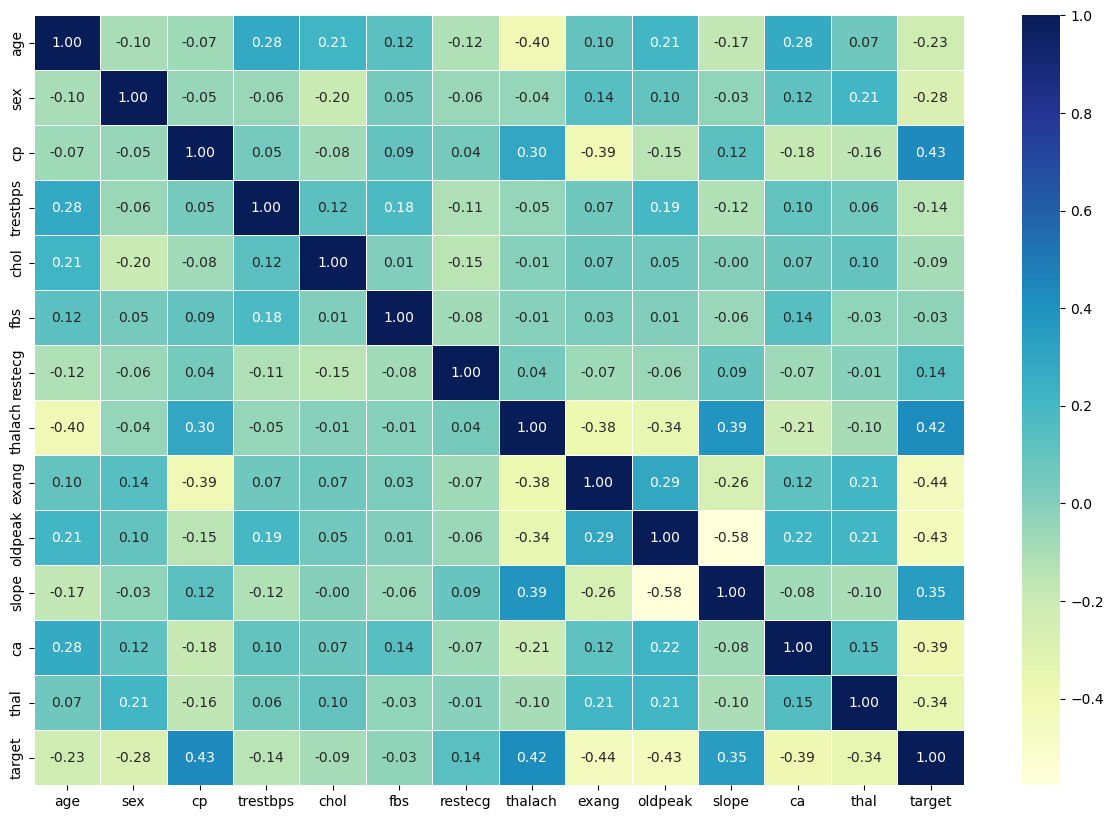

In [22]:
#Let's make our correlation matrix more visual
corr_matrix=df.corr()
fig,ax=plt.subplots(figsize=(15,10))
ax=sns.heatmap(corr_matrix,
                  annot=True,
                  linewidth=0.5,
                  fmt=".2f",
                  cmap="YlGnBu")

In [23]:
##5. Modelling

In [24]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [25]:
#Split our data into features and labels
x=df.drop("target",axis=1)
y=df["target"]

In [26]:
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [27]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [28]:
#Split the data into train, test and split
np.random.seed(42)

#Split into train & test set
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [29]:
#Now we got our data into training set and test set
#We will train it and find patterns on the training set
#Then we'll use the patterns on the test set

In [30]:
#We are going to try 3 different models
# 1. Logistic regression
# 2. K-nearest neighbours classifier
# 3. RandomForestClassifier

In [31]:
#Put models in a dictionary
models={"Logistic Regression":LogisticRegression(),
        "KNN":KNeighborsClassifier(),
        "Random Forest":RandomForestClassifier()
}

#Create a function to fit and score our models
def fit_score(models,x_train,x_test,y_train,y_test):
    #Model is a dict of different sklearn machine learning model
    #Set random seed
    np.random.seed(42)
    #Make a dict to keep model scores
    model_scores={}
    #loop through models
    for name,model in models.items():
        #Fit the model to the training data
        model.fit(x_train,y_train)
        #Evaluate the model and append it to the model_scores
        model_scores[name]=model.score(x_test,y_test)
    return model_scores

In [32]:
model_scores=fit_score(models,x_train,x_test,y_train,y_test)
model_scores

C:\Users\cheta\MLprojects\heart_disease_project\env\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

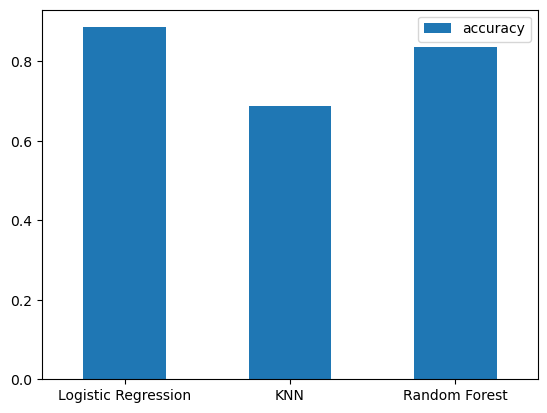

In [33]:
#Model Comparison
model_compare=pd.DataFrame(model_scores,index=["accuracy"])
model_compare.T.plot.bar();
plt.xticks(rotation=0);

In [34]:
#Now we got a baseline model and we know our model predictions are not always
#what we expect our next steps off 

#Lets look at the following
#Hyperparameter tuning
#Feature importance
#Accuracy
#Precision
#Confusion matrix
#Recall
#F1 score
#Classification Report
#ROC curve
#AUC curve

In [35]:
#Lets tune KNN

In [36]:
train_scores=[]
test_scores=[]

#Create a list of n neighbours for tuning knn
neighbors=range(1,21)

#Setup KNN instance
knn=KNeighborsClassifier()

#Loop through differenct n neighbours
for i in neighbors:
    knn.set_params(n_neighbors=i)

    #Fit the algorithm
    knn.fit(x_train,y_train)

    #Score it and update to the train scores list
    train_scores.append(knn.score(x_train,y_train))
    
    #Score it and update to the test scores list
    test_scores.append(knn.score(x_test,y_test))

In [37]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

Maximum knn score on the test data:75.41%


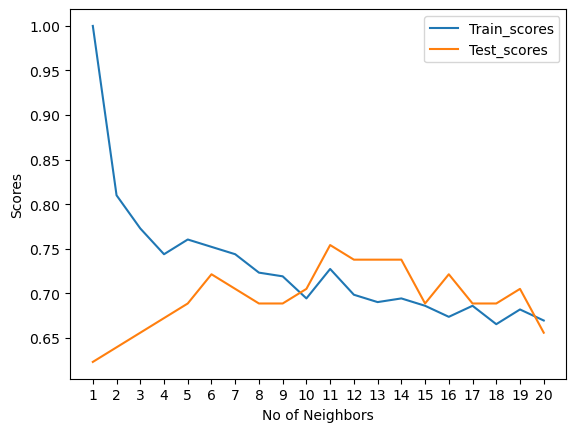

In [38]:
plt.plot(neighbors,train_scores,label="Train_scores");
plt.plot(neighbors,test_scores,label="Test_scores");
plt.xticks(np.arange(1,21,1))
plt.xlabel("No of Neighbors")
plt.ylabel("Scores")
plt.legend();
print(f"Maximum knn score on the test data:{max(test_scores)*100:.2f}%")

In [39]:
#Initially it was 68% but with tuning n neigbors=11 hyperparamets we could bring 
#it to 75% but it is still less than two other model so we sideline this model

In [40]:
#Hyperparameter tuning using RandomizedSearchCV

#We are going to Logistic regression model() and RandomForestClassifier()

In [41]:
#Create a Hyperparameter grid for logistic Regression

In [42]:
log_reg_grid={"C":np.logspace(-4,4,20),
                "solver":["liblinear"] 
}


In [43]:
#Create a Hyperprameter grid for RandomForest Classifier

In [44]:
ran_grid={"n_estimators":np.arange(10,1000,50),
            "max_depth":[None,3,5,10],
            "min_samples_split":np.arange(2,20,2),
            "min_samples_leaf":np.arange(1,20,2)
             }

In [45]:
np.logspace(-4,4,20)

array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04])

In [46]:
#Now we got hyperparamets grid set up for each of our models tune them using
#RandomizedSearchCv

In [47]:
#Tune Logistic Regression

np.random.seed(42)

#Set up random hyperparameter search for LogisticRegression
rs_log_reg=RandomizedSearchCV(LogisticRegression(),
                              log_reg_grid,
                              cv=5,
                              n_iter=20,
                              verbose=True)

#Fit random Search model for LogisticRegression
rs_log_reg.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [48]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [49]:
rs_log_reg.score(x_test,y_test)

0.8852459016393442

In [50]:
#Lets do the same for RandomForestClassifier()

In [51]:
#Setup random seed
np.random.seed(42)

#Setup random hyperameter search for RandomForstClassifier()
rs_rf=RandomizedSearchCV(RandomForestClassifier(),
                         ran_grid,
                         cv=5,
                         n_iter=20,
                         verbose=True)

#Fit random hyperarameter search model for RandomForestClassifier()
rs_rf.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [52]:
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [53]:
#Evaluate the randomized Search Model
rs_rf.score(x_test,y_test)

0.8688524590163934

In [54]:
#Hypertuning using GridSearchCv
#Since logisiticRegression provides us with the best results we will tune 
#the hyperparameters using GridSearcHCV

log_reg_grid={"C":np.logspace(-4,4,30),
                "solver":["liblinear"] 
}

#Set up the grid
gs_log_reg=GridSearchCV(LogisticRegression(),
                        log_reg_grid,
                        cv=5,
                        verbose=True)
#Fit 
gs_log_reg.fit(x_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [55]:
#Check the best parameters
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [56]:
#Evaluate the gridSearch logisticRegression model
gs_log_reg.score(x_test,y_test)

0.8852459016393442

In [57]:
##Evaluating our tuned machine learning classifier, beyond accuracy

#ROC CURVE AND ROC CURVE
#CONFUSION MATRIX
#CLASSIFICATION REPORT
#PRECISION
#RECALL
#F1_SCORE

#AND IT WOULD BE GREAT IF CROSS-VALIDATION IS USED..

In [58]:
#MAKE PREDICTIONS
y_preds=gs_log_reg.predict(x_test)

In [59]:
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [60]:
y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

In [61]:
#Plot ROC curve
from sklearn.metrics import RocCurveDisplay

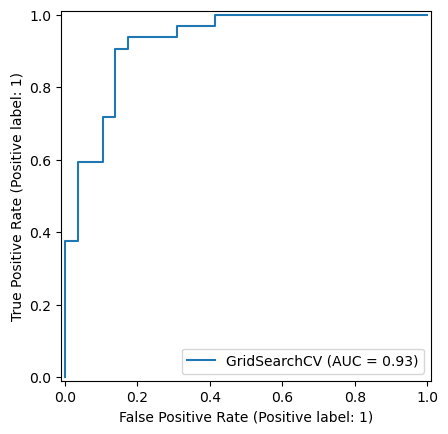

In [62]:
RocCurveDisplay.from_estimator(gs_log_reg,x_test,y_test)

In [63]:
#Confusion matrix
print(confusion_matrix(y_test,y_preds))

[[25  4]
 [ 3 29]]


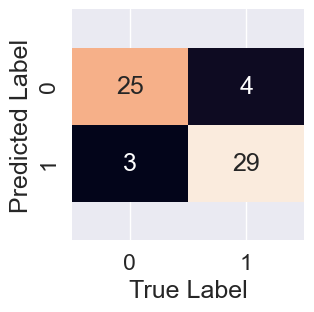

In [64]:
sns.set(font_scale=1.5)

def plot_conf_matrix(y_test,y_preds):
    """
       plot confusion matrix using seaborn heatmap
    """
    fig,ax=plt.subplots(figsize=(3,3))
    ax=sns.heatmap(confusion_matrix(y_test,y_preds),
                   annot=True,
                   cbar=False)
    bottom,top=ax.get_ylim()
    ax.set_ylim(bottom+0.5,top-0.5)
    plt.xlabel("True Label")
    plt.ylabel("Predicted Label")

plot_conf_matrix(y_test,y_preds)

In [65]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



In [66]:
#Calculate evaluation metrics using cross-validation and to do so 
#We will use cross_val_score

In [67]:
#Check best hyperparameters

In [68]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [69]:
#Create a new classifier using these parameters
clf=LogisticRegression(C=0.20433597178569418, solver="liblinear")

In [70]:
#Cross Validated accuracy
cv_acc=cross_val_score(clf,
                       x,
                       y,
                       cv=5,
                       scoring="accuracy")
cv_acc=np.mean(cv_acc)
cv_acc

0.8446994535519124

In [71]:
#Cross Validated precision
cv_prec=cross_val_score(clf,
                       x,
                       y,
                       cv=5,
                       scoring="precision")
cv_prec=np.mean(cv_prec)
cv_prec

0.8207936507936507

In [72]:
#Cross Validated recall
cv_rec=cross_val_score(clf,
                       x,
                       y,
                       cv=5,
                       scoring="recall")
cv_rec=np.mean(cv_rec)
cv_rec

0.9212121212121213

In [73]:
#Cross Validated f1_score
cv_f1=cross_val_score(clf,
                       x,
                       y,
                       cv=5,
                       scoring="f1")
cv_f1=np.mean(cv_f1)
cv_f1

0.8673007976269721

In [74]:
#Visualise the cross-validated metics
cv_metrics=pd.DataFrame({"Accuracy":cv_acc,
                        "Precision":cv_prec,
                         "Recall":cv_rec,
                         "f1_score":cv_f1},
                         index=[0])
cv_metrics

,Accuracy,Precision,Recall,f1_score
0,0.844699,0.820794,0.921212,0.867301


<Axes: title={'center': 'cross-validated metrics'}>

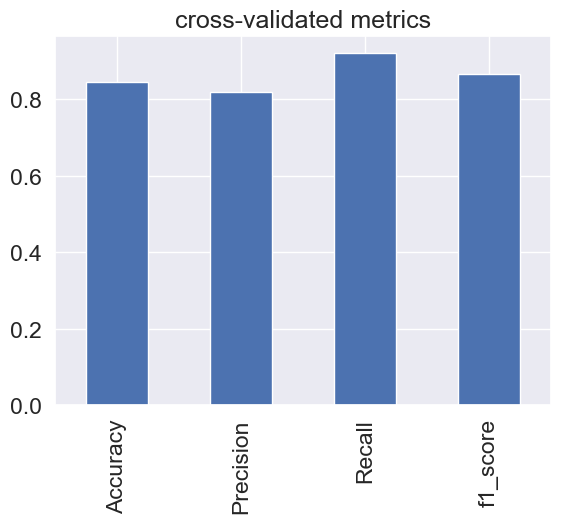

In [75]:
cv_metrics.T.plot.bar(title="cross-validated metrics", legend=None)

In [78]:
#Feature Importance

#Finding Feature importance is different for each machine learning model
#One way to find feature importance is to search for (Model Name) feature 
#Importance


#Feature Importance is another way of asking which feature contributed most to the 
#outcomes of the model

In [79]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [81]:
#Fit an instance of Logistic Regression
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [82]:
clf=LogisticRegression(C=0.20433597178569418,solver='liblinear')
clf.fit(x_train,y_train)

LogisticRegression(C=0.20433597178569418, solver='liblinear')

In [84]:
#Check coef
clf.coef_

array([[ 0.00316728, -0.86044651,  0.66067041, -0.01156993, -0.00166374,
         0.04386107,  0.31275847,  0.02459361, -0.6041308 , -0.56862804,
         0.45051628, -0.63609897, -0.67663373]])

In [87]:
#Match coef of features to columns
feature_dict=dict(zip(df.columns,list(clf.coef_[0])))
feature_dict

{'age': 0.0031672801993431563,
 'sex': -0.8604465072345515,
 'cp': 0.6606704082033799,
 'trestbps': -0.01156993168080875,
 'chol': -0.001663744504776871,
 'fbs': 0.043861071652469864,
 'restecg': 0.31275846822418324,
 'thalach': 0.024593613737779126,
 'exang': -0.6041308000615746,
 'oldpeak': -0.5686280368396555,
 'slope': 0.4505162797258308,
 'ca': -0.6360989676086223,
 'thal': -0.6766337263029825}

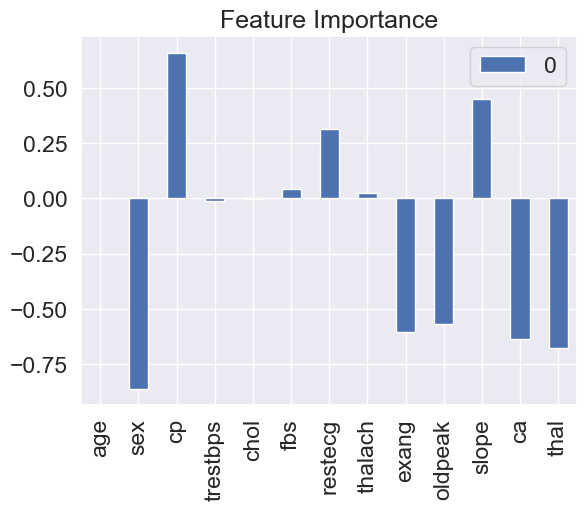

In [91]:
#Visualise feature importance
feature_dict=pd.DataFrame(feature_dict,index=[0])
feature_dict.T.plot.bar(title="Feature Importance");

In [92]:
pd.crosstab(df["sex"],df["target"])

target,0,1
sex,,
0,24,72
1,114,93


In [93]:
#Experimentation

#If you havent hit your evaluation metric yet 

#collect more data
#try a better model 
#Is your model good enough